# Le meilleur jeu de tout les temps

## Ouverture ,nettoyage du fichier/ Création du dictionnaire

In [2]:
tgs = []
with open("vgsales.csv", "r", encoding = "utf-8-sig") as fichier :
    entetes = fichier.readline().strip()#strip enlève les espaces à droite et à gauche de la chaine de caractères
    cles = entetes.split(",") # Les clés des dictionnaires sont les en-têtes des colonnes séparé par des virgules
    for ligne in fichier:
        valeurs = ligne.split(",") # Les valeurs des dictionnaires sont les champs séparés par des virgules
        entree = {} # Une entrée représente un dico de la table dans un dictionnaire
        for cle, valeur in zip(cles, valeurs) :
            if '\n' in valeur:
                valeur=valeur.replace('\n','')
            if cle not in ['rank', 'year','NA_sales','EU_sales','JP_sales','Other_sales','Global_sales']: # Si la clé est de type str on affecte directement la valeur
                entree[cle] = valeur
            elif cle == 'NA_sales'or'EU_sales'or'JP_sales'or'Other_sales'or'Global_sales' : # Si la clé est à virgule, on convertit la valeur en float
                entree[cle] = float(valeur)
            else: # Si la clé est entière, on convertit la valeur en int
                entree[cle] = int(valeur)#Les 6 dernières lignes servent à pouvoir exploiter les données en les transformant de caractère à valeur (ou pas)
        tgs.append(entree)



tgs

[{'Rank': '1',
  'Name': 'Wii Sports',
  'Platform': 'Wii',
  'Year': '2006',
  'Genre': 'Sports',
  'Publisher': 'Nintendo',
  'NA_Sales': '41.49',
  'EU_Sales': '29.02',
  'JP_Sales': '3.77',
  'Other_Sales': '8.46',
  'Global_Sales': '82.74'},
 {'Rank': '2',
  'Name': 'Super Mario Bros.',
  'Platform': 'NES',
  'Year': '1985',
  'Genre': 'Platform',
  'Publisher': 'Nintendo',
  'NA_Sales': '29.08',
  'EU_Sales': '3.58',
  'JP_Sales': '6.81',
  'Other_Sales': '0.77',
  'Global_Sales': '40.24'},
 {'Rank': '3',
  'Name': 'Mario Kart Wii',
  'Platform': 'Wii',
  'Year': '2008',
  'Genre': 'Racing',
  'Publisher': 'Nintendo',
  'NA_Sales': '15.85',
  'EU_Sales': '12.88',
  'JP_Sales': '3.79',
  'Other_Sales': '3.31',
  'Global_Sales': '35.82'},
 {'Rank': '4',
  'Name': 'Wii Sports Resort',
  'Platform': 'Wii',
  'Year': '2009',
  'Genre': 'Sports',
  'Publisher': 'Nintendo',
  'NA_Sales': '15.75',
  'EU_Sales': '11.01',
  'JP_Sales': '3.28',
  'Other_Sales': '2.96',
  'Global_Sales': '33

## Diagrammes et tableaux

### Les genres de jeu

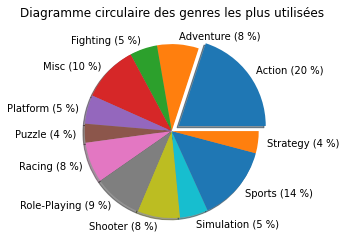

In [3]:
import matplotlib.pyplot as plt   #pour les graphiques
import numpy as np

genre = {}

for ligne in tgs:
    if ligne['Genre'] in genre:#classe est la clé du dictionnaire
        genre[ligne['Genre']] += 1
    else:
        genre[ligne['Genre']] = 1

explode=[0.1,0,0,0,0,0,0,0,0,0,0,0]
plt.figure()#crée une figure
plt.pie([genre[c] for c in sorted(genre)], labels=[f"{c} ({round(genre[c] / len(tgs) * 100)} %)" for c in sorted(genre)],shadow=True,explode=explode)#trouve l'angle en fonctions du nombre total et du nombre de la partie
plt.title("Diagramme circulaire des genres les plus utilisées")#titre au diagramme
plt.show()#affiche la figure

### Liste des genres de jeux classé par pourcentage dans le top 1000 des jeux les plus vendu (superieur ou égale à  5%)
|genre|pourcentage|
|:--------------|---------------:|
|Action|20%|
|sports|14%|
|divers(misc)|10%|
|role-play|9%|
|jeux de tir|8%|
|course|8%|
|Aventure|8%|
|combat|5%|
|simulation|5%|
|Platforme|5%|

## les régions de ventes

Test:

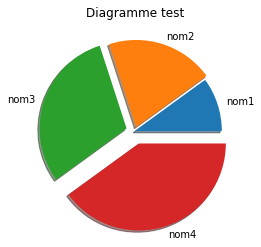

In [29]:
explode=[0,0.05,0.1,0.15]
plt.figure()#crée une figure
plt.pie([1,2,3,4], labels=["nom1","nom2","nom3","nom4"],shadow=True,explode=explode)#trouve l'angle en fonctions du nombre total et du nombre de la partie
plt.title("Diagramme test")#titre au diagramme
plt.show()#affiche la figure

### Trouver les erreurs

Ci dessous, il y avait des erreur car il y avait des virgules dans des titres de jeux vidéo.


Je n'avait pas les capacitées de parcourir un fichier et d'enlever la virgule si elle était entre des guillemet juste avec un programme.


J'ai donc fait un compteur qui compte jusqu'a ce qu'il y ait une erreur.
J'avais donc la ligne-1 ou il y avait une erreur,ce qui me permetait d'aller chercher la virgule au bonne endroit.

In [16]:
ventes_jp=0
ventes_eu=0
ventes_us=0

tst=0
for ligne in tgs:
    for cle, valeur in zip(cles, valeurs) :
        if cle=='NA_Sales':
            ventes_us+=float(ligne[cle])
            tst+=1
            print(tst)
            
print(ventes_us)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054


5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053


9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395


11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
1197

13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
1351

15351
15352
15353
15354
15355
15356
15357
15358
15359
15360
15361
15362
15363
15364
15365
15366
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
15377
15378
15379
15380
15381
15382
15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15394
15395
15396
15397
15398
15399
15400
15401
15402
15403
15404
15405
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15425
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15509
15510
15511
15512
15513
15514
15515
15516
1551

nombre de ventes en Amérique du nord: 4392.95
nombre de vente en Europe: 2434.13
nombre de ventes au Japon: 1291.02
nombre de ventes au total: 8920.44
nombre d'erreur: 0


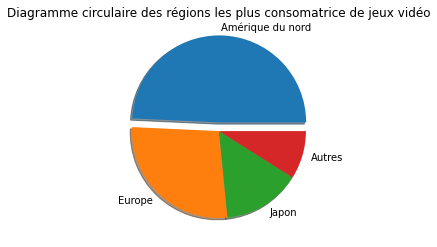

In [17]:
ventes_jp=0
ventes_eu=0
ventes_us=0
ventes_autres=0
ventes_tot=0
nombre_d_erreur=0

for ligne in tgs:
    for cle, valeur in zip(cles, valeurs) :
        if cle=='NA_Sales':
            ventes_us+=float(ligne[cle])
        if cle=='EU_Sales':
            ventes_eu+=float(ligne[cle])
        if cle=='JP_Sales':
            ventes_jp+=float(ligne[cle])
        if cle=='Other_Sales':
            ventes_autres+=float(ligne[cle])
        if cle=='Global_Sales':
            try:
                ventes_tot+=float(ligne[cle])
            except:
                nombre_d_erreur+=1

print(f"nombre de ventes en Amérique du nord: {round(ventes_us,2)}")
print(f"nombre de vente en Europe: {round(ventes_eu,2)}")
print(f"nombre de ventes au Japon: {round(ventes_jp,2)}")
print(f"nombre de ventes au total: {round(ventes_tot,2)}")
print(f"nombre d'erreur: {nombre_d_erreur}")
explode=(0.1, 0, 0, 0)
plt.figure()#crée une figure
plt.pie([ventes_us,ventes_eu,ventes_jp,ventes_autres], labels=["Amérique du nord","Europe","Japon","Autres"],shadow=True,explode=explode)#trouve l'angle en fonctions du nombre total et du nombre de la partie
plt.title("Diagramme circulaire des régions les plus consomatrice de jeux vidéo")#titre au diagramme
plt.show()#affiche la figure

### pour un peu plus de réalisme :

|Région|Nombre d'habitant|
|:--------------|---------------:|
|Amérique du nord|579 000 000|
|Europe|743 000 000|
|Japon|125 104 000|
|Autres|6 553 000 000|

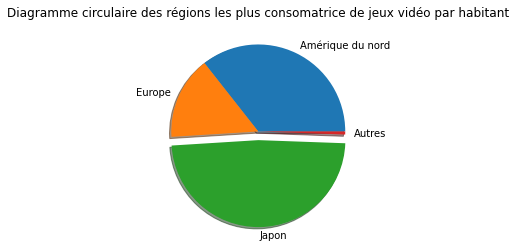

In [18]:
explode=(0, 0, 0.1, 0)
plt.figure()#crée une figure
plt.pie([ventes_us/579000000,ventes_eu/743000000,ventes_jp/125104000,ventes_autres/6553000000], labels=["Amérique du nord","Europe","Japon","Autres"],shadow=True,explode=explode)#trouve l'angle en fonctions du nombre total et du nombre de la partie
plt.title("Diagramme circulaire des régions les plus consomatrice de jeux vidéo par habitant")#titre au diagramme
plt.show()#affiche la figure

## Les plateformes de jeu

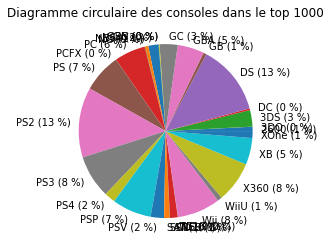

In [19]:
plateforme= {}

for ligne in tgs:
    if ligne['Platform'] in plateforme:#classe est la clé du dictionnaire
        plateforme[ligne['Platform']] += 1
    else:
        plateforme[ligne['Platform']] = 1

plt.figure()#crée une figure
plt.pie([plateforme[c] for c in sorted(plateforme)], labels=[f"{c} ({round(plateforme[c] / len(tgs) * 100)} %)" for c in sorted(plateforme)])#trouve l'angle en fonctions du nombre total et du nombre de la partie
plt.title("Diagramme circulaire des consoles dans le top 1000")#titre au diagramme
plt.show()#affiche la figure

### Néttoyage...

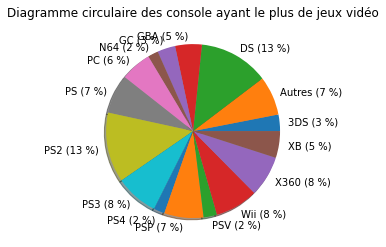

In [20]:
plateforme= {}
autres=0
nouvplatforme={}
for ligne in tgs:
    if ligne['Platform'] in plateforme:#classe est la clé du dictionnaire
        plateforme[ligne['Platform']] += 1
    else:
        plateforme[ligne['Platform']] = 1

for ligne in plateforme:
    if plateforme[ligne]>300:#si il y a plus de 300 jeux sur la plateforme elle rentre dans le diagramme V2
        nouvplatforme[ligne]=plateforme[ligne]
    else:
        autres += plateforme[ligne]
nouvplatforme["Autres"]=autres

plt.figure()#crée une figure
plt.pie([nouvplatforme[c] for c in sorted(nouvplatforme)], labels=[f"{c} ({round(nouvplatforme[c] / len(tgs) * 100)} %)" for c in sorted(nouvplatforme)],shadow=True)#trouve l'angle en fonctions du nombre total et du nombre de la partie
plt.title("Diagramme circulaire des console ayant le plus de jeux vidéo")#titre au diagramme
plt.show()#affiche la figure

|Console|Nombre d'année depuis sa sortie jusqu'à la création du fichier CSV(2016)|
|:--------------|---------------:|
|3DS|5|
|Xbox|15|
|X360|11|
|wii|10|
|PSV|5|
|PSP|12|
|PS4|3|
|PS3|10|
|PS2|16|
|PS|22|
|PC(1er jeu sorti sur PC)|62|
|N64|20|
|GC|15|
|GBA|13|
|DS|12|

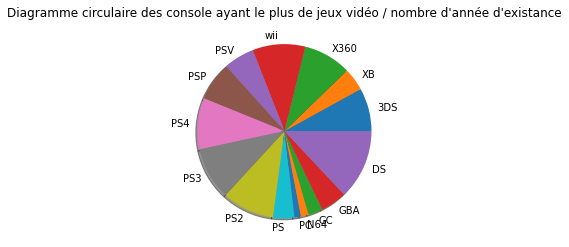

In [21]:
plt.figure()#crée une figure
plt.pie([(3+(7/15))/5,(5+(7/15))/15,(8+(7/15))/11,(8+(7/15))/10,(2+(7/15))/5,(7+(7/15))/12,(2+(7/15))/3,(8+(7/15))/10,(13+(7/15))/16,(7+(7/15))/22,(6+(7/15))/62,(2+(7/15))/20,(3+(7/15))/15,(5+(7/15))/13,(13+(7/15))/12], labels=["3DS","XB","X360","wii","PSV","PSP","PS4","PS3","PS2","PS","PC","N64","GC","GBA","DS"],shadow=True)#trouve l'angle en fonctions du nombre total et du nombre de la partie
plt.title("Diagramme circulaire des console ayant le plus de jeux vidéo / nombre d'année d'existance")#titre au diagramme
plt.show()#affiche la figure

### les consoles récentes on moins de jeux vidéo ?

Peut-être que le dévellopement de jeux vidéo actuelle prends plus de temps qu'avant mais c'est sans aucun doutes une bonne chose que d'avoir plus de qualité que de quantité.

## Fusion de 2 tableau en 1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

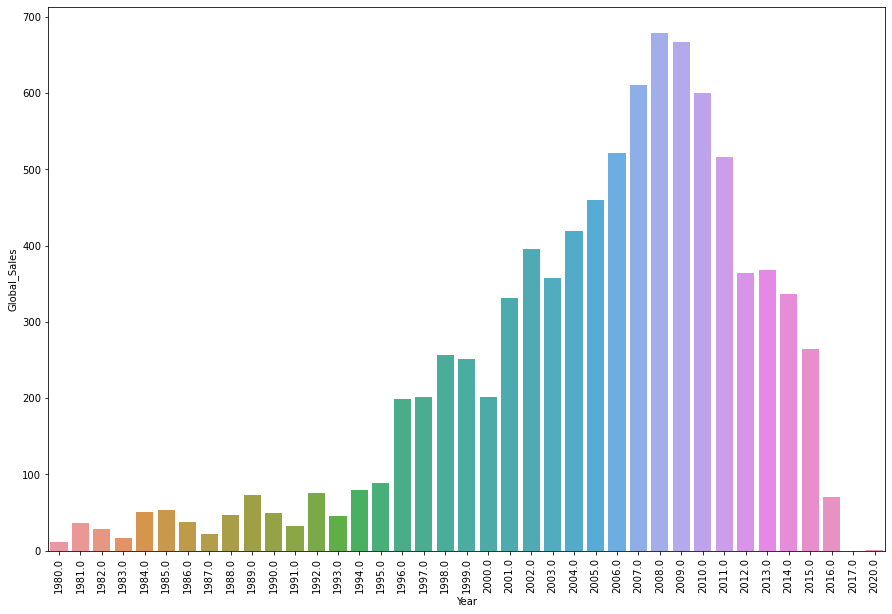

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('vgsales.csv')
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

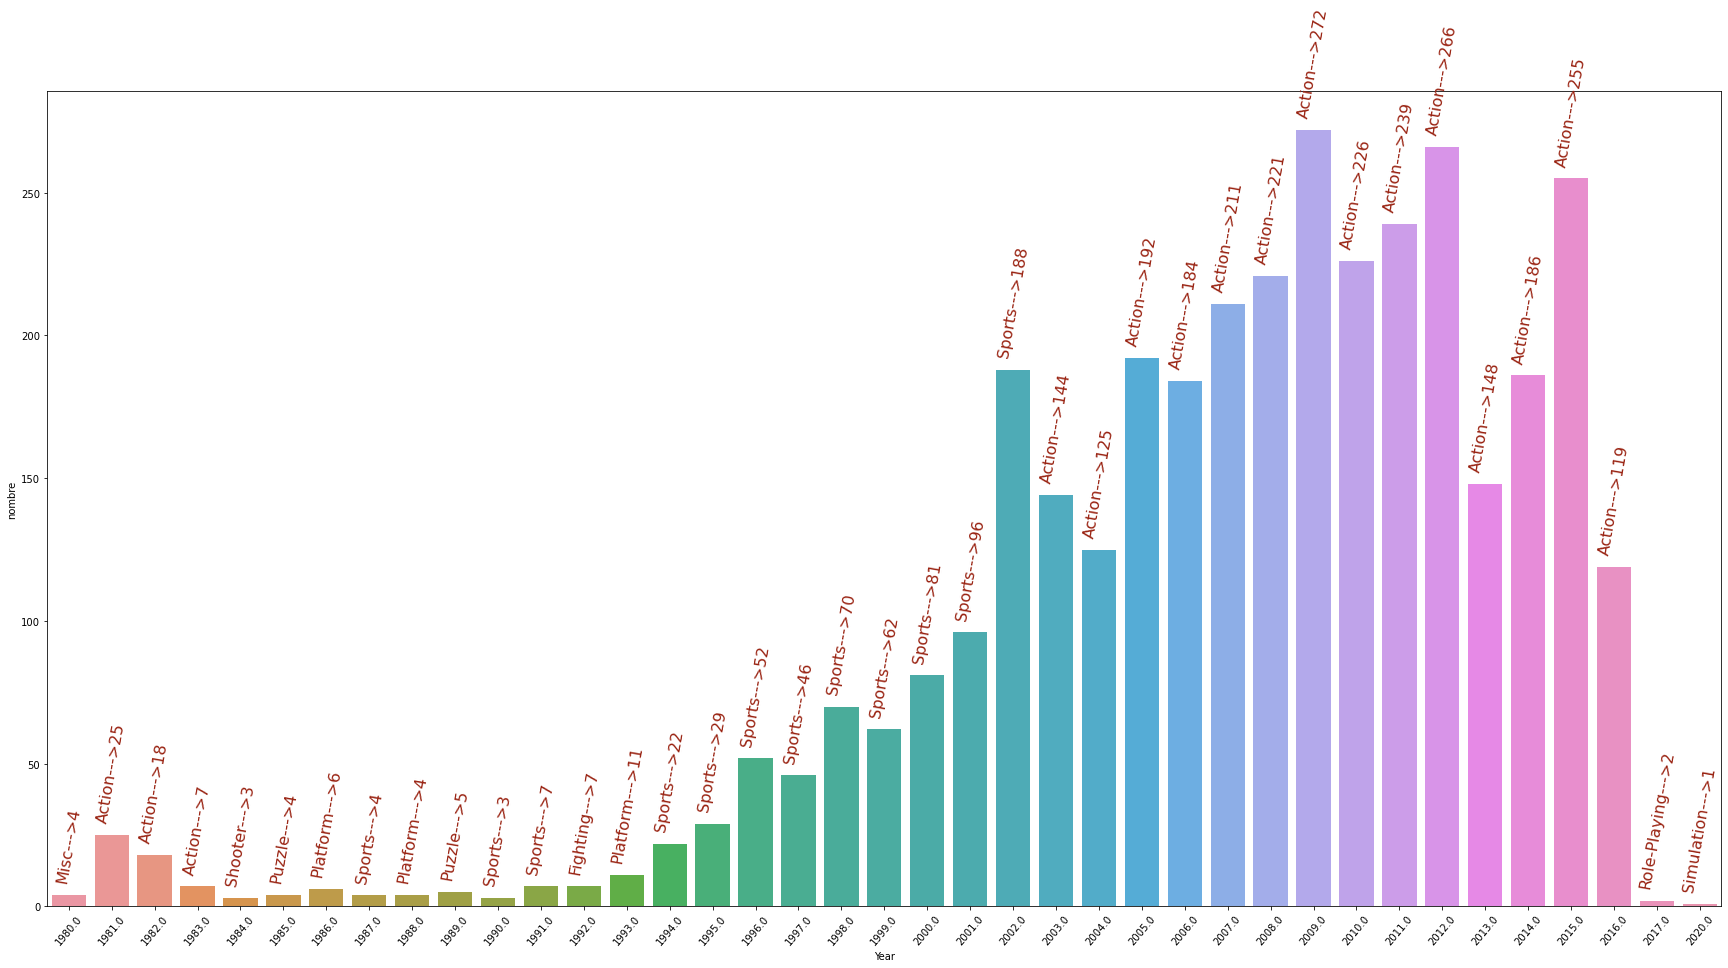

In [23]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='nombre')#on regroupe année et genre, on l'appelle nombre
year_max_idx = year_max_df.groupby(['Year'])['nombre'].transform(max) == year_max_df['nombre']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "nombre"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
graph = sns.barplot(x='Year', y='nombre', data=year_max_genre)#
index = 0
for value in year_max_genre['nombre'].values:
    graph.text(index, value + 5, str(genre[index] + '--->' +str(value)), color='#921', size=16, rotation= 80, ha="center")
    index += 1


plt.xticks(rotation=50)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

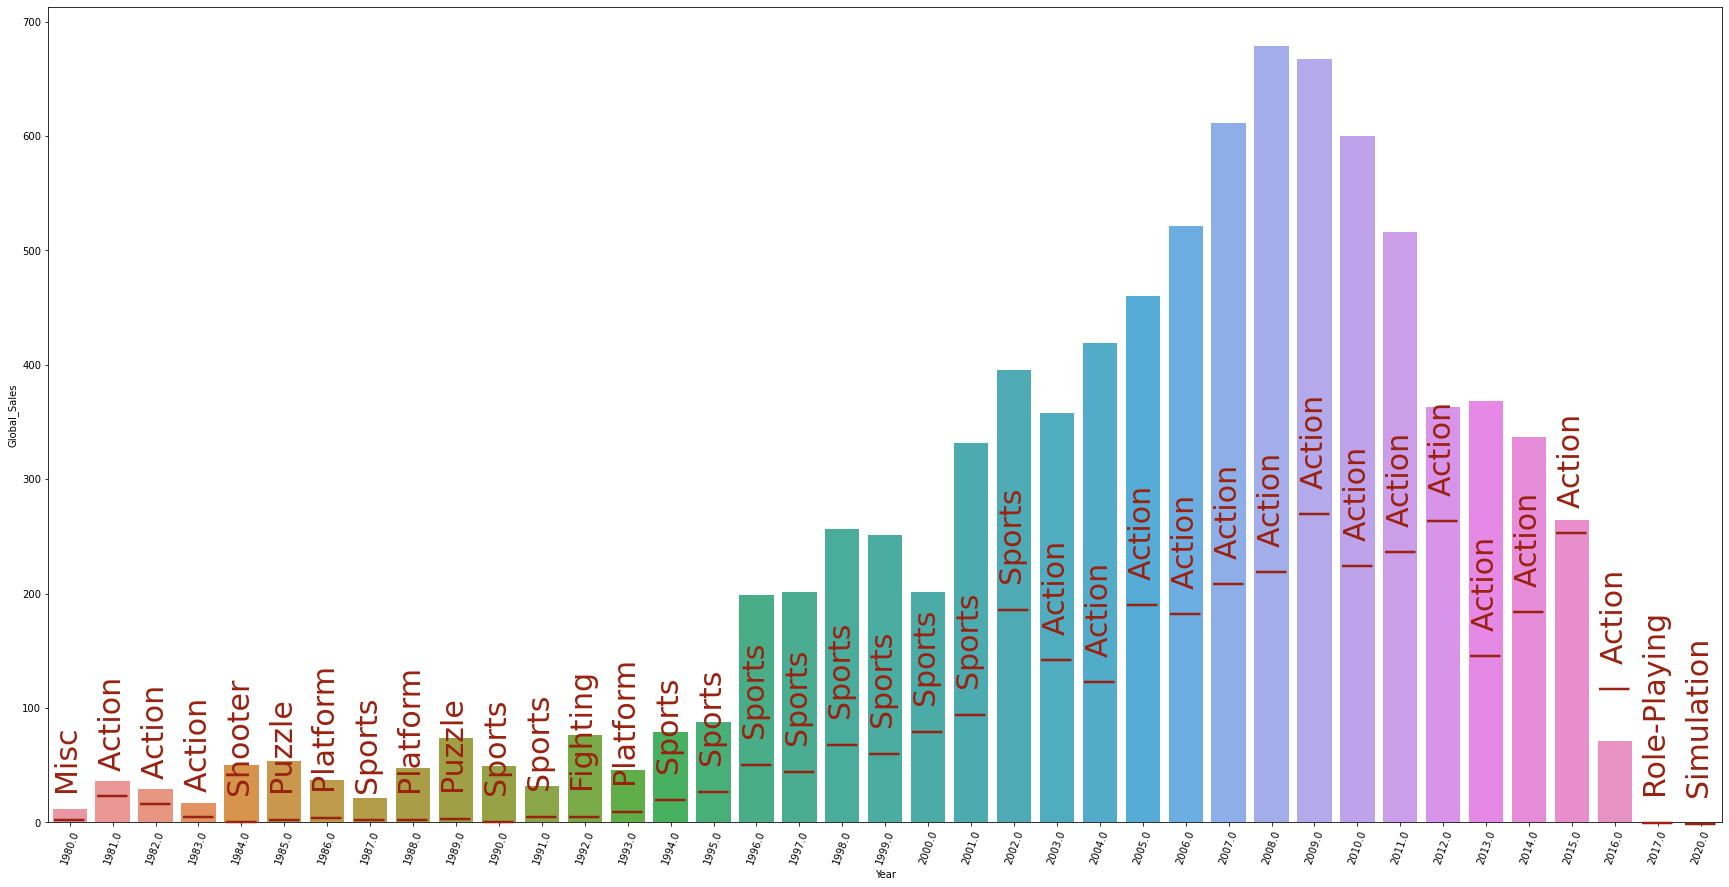

In [24]:


data = pd.read_csv('vgsales.csv')
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='nombre')#on regroupe année et genre, on l'appelle nombre
year_max_idx = year_max_df.groupby(['Year'])['nombre'].transform(max) == year_max_df['nombre']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "nombre"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values



index=0

plt.figure(figsize=(30, 15))


graph=sns.barplot(x="Year", y="Global_Sales", data=data_year)
for value in year_max_genre['nombre'].values:
    graph.text(index,value+1, str('|  '+genre[index]), color='#921', size=30, rotation= 90, ha="center")
    index += 1


plt.xticks(rotation=70)